In [9]:
import pandas as pd
import pyarrow.parquet as pq
import pyarrow.fs as fs
#import seaborn as sns
import matplotlib.pyplot as plt
#from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression
#from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [10]:
import pandas as pd
import pyarrow as pa
from pyarrow import parquet as pq
from pyarrow import fs

# 🔐 lakeFS credentials
ACCESS_KEY = "access_key"
SECRET_KEY = "secret_key"
lakefs_endpoint = "http://lakefs-dev:8000/"

# ✅ เชื่อมต่อ FileSystem ของ LakeFS
s3 = fs.S3FileSystem(
    access_key=ACCESS_KEY, 
    secret_key=SECRET_KEY, 
    endpoint_override=lakefs_endpoint
)

# ✅ ระบุ Path หลัก
base_path = 'weather/main/weather.parquet/year=2025/month=5/'

# ✅ วันที่ที่ต้องการดึงข้อมูล
days = [13, 14, 15]

# ✅ สร้าง List เก็บ DataFrame
df_list = []

# ✅ อ่านข้อมูลจากแต่ละวันและรวมเป็น DataFrame
for day in days:
    path = f"{base_path}day={day}/"
    print(f"Loading data from: {path}")
    
    # อ่านข้อมูล Parquet
    dataset = pq.ParquetDataset(path, filesystem=s3)
    
    # อ่านข้อมูล Schema ของ dataset
    schema = dataset.schema
    
    # ✅ แปลง Schema ให้เป็น float64 สำหรับทุกคอลัมน์ที่เป็น float32 หรือ int64
    fields = []
    for i in range(len(schema)):
        field = schema.field(i)
        if isinstance(field.type, pa.FloatArray) or field.type == pa.float32():
            fields.append(pa.field(field.name, pa.float64()))  # แปลงเป็น float64
        elif field.type == pa.int64():  # ตรวจสอบชนิด int64
            fields.append(pa.field(field.name, pa.float64()))  # แปลง int64 เป็น float64
        else:
            fields.append(field)
    
    # สร้าง Schema ใหม่จาก fields ที่แก้ไขแล้ว
    new_schema = pa.schema(fields)
    
    # อ่านข้อมูลและแปลงเป็น DataFrame
    try:
        table = dataset.read().cast(new_schema)
        df = table.to_pandas()
    except Exception as e:
        print(f"Error reading {path}: {e}")
        continue
    
    # ✅ เพิ่ม DataFrame ลงใน List
    df_list.append(df)

# ✅ รวมทุก DataFrame เข้าด้วยกัน
final_df = pd.concat(df_list, ignore_index=True)

# ✅ ตรวจสอบข้อมูล
print(final_df.info())
print(final_df.head())
print(f"Total Records Loaded: {len(final_df)}")

Loading data from: weather/main/weather.parquet/year=2025/month=5/day=13/
Loading data from: weather/main/weather.parquet/year=2025/month=5/day=14/
Loading data from: weather/main/weather.parquet/year=2025/month=5/day=15/
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207210 entries, 0 to 207209
Data columns (total 26 columns):
 #   Column               Non-Null Count   Dtype                       
---  ------               --------------   -----                       
 0   timestamp            207210 non-null  datetime64[ns]              
 1   minute               207210 non-null  float64                     
 2   created_at           207210 non-null  datetime64[ns, Asia/Bangkok]
 3   district             207210 non-null  object                      
 4   province             207210 non-null  object                      
 5   location             207210 non-null  object                      
 6   weather_main         207210 non-null  object                      
 7   weather_descri

In [11]:
print(final_df.select_dtypes(include=['object']).columns)

Index(['district', 'province', 'location', 'weather_main',
       'weather_description'],
      dtype='object')


In [12]:
# 🔍 เลือกเฉพาะคอลัมน์ที่เป็นตัวเลข
final_df = final_df.select_dtypes(include=['float64', 'int64'])

In [13]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


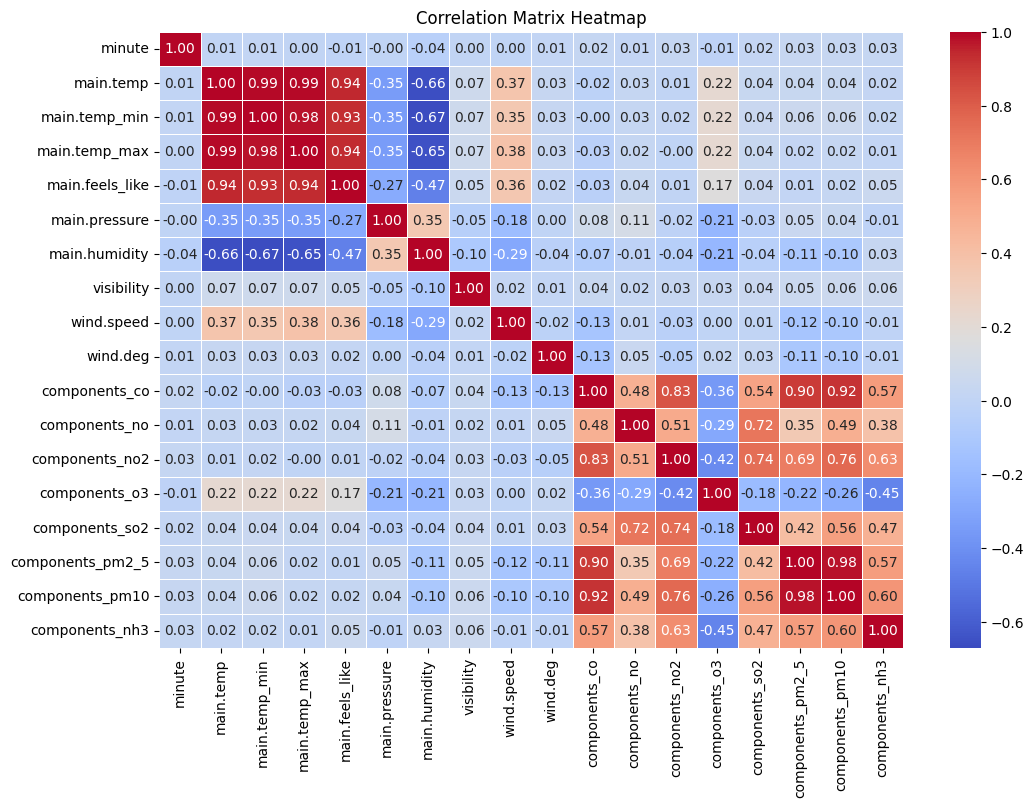

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# ✅ คำนวณ Correlation Matrix
corr_matrix = final_df.corr()

# ✅ วาด Heatmap สำหรับ Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [15]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [18]:
# ลบคอลัมน์ที่มีค่า NaN
features = features.dropna(axis=1)
# ตรวจสอบผลลัพธ์
print(features.isnull().sum())  # ควรจะไม่มีค่า NaN อีกต่อไป

NameError: name 'features' is not defined